Q5. Pitch Detection Using Autocorrelation

In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

sampling_rate, signal = wavfile.read("testing_voice.wav")

if len(signal.shape) > 1:
    signal = signal[:, 0]

signal = signal.astype(float)


C:\Users\Apurbo\AppData\Local\Temp\ipykernel_13924\3188843573.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, signal = wavfile.read("testing_voice.wav")


(a) Autocorrelation-Based Pitch Estimation (Per Frame)

1️⃣ Framing (25 ms, 10 ms)

In [2]:
frame_size = int(0.025 * sampling_rate)
frame_shift = int(0.010 * sampling_rate)

signal_length = len(signal)
num_frames = int(np.floor((signal_length - frame_size) / frame_shift)) + 1

frames = np.zeros((num_frames, frame_size))

for i in range(num_frames):
    start = i * frame_shift
    end = start + frame_size
    frames[i] = signal[start:end]


2️⃣ Define Pitch Range (Human Speech)

In [3]:
min_f0 = 50
max_f0 = 400

min_lag = int(sampling_rate / max_f0)
max_lag = int(sampling_rate / min_f0)


3️⃣ Autocorrelation Per Frame

In [4]:
pitch = np.zeros(num_frames)

for i in range(num_frames):
    frame = frames[i]
    
    # Remove DC component
    frame = frame - np.mean(frame)
    
    # Autocorrelation
    autocorr = np.correlate(frame, frame, mode='full')
    autocorr = autocorr[len(autocorr)//2:]  # Keep positive lags
    
    # Search peak in pitch range
    search_region = autocorr[min_lag:max_lag]
    
    peak_index = np.argmax(search_region)
    lag = peak_index + min_lag
    
    pitch[i] = sampling_rate / lag


(b) Voiced/Unvoiced Detection Using Energy Threshold

In [5]:
energy = np.sum(frames**2, axis=1)

threshold = 0.1 * np.max(energy)

voiced = energy > threshold

# Set pitch = 0 for unvoiced frames
pitch[~voiced] = 0


(c) Plot Pitch Contour (F0 vs Time)

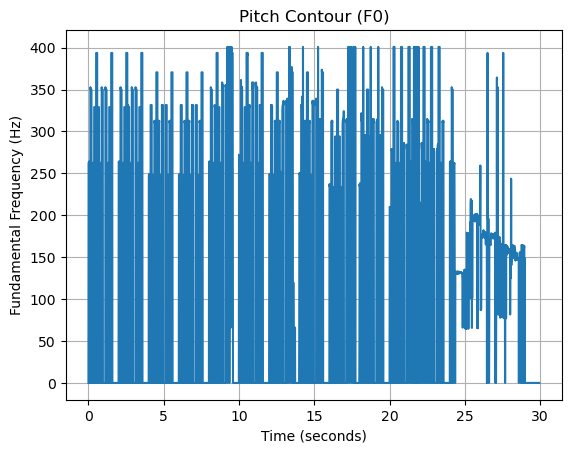

In [6]:
time_axis = np.arange(num_frames) * (frame_shift / sampling_rate)

plt.figure()
plt.plot(time_axis, pitch)
plt.xlabel("Time (seconds)")
plt.ylabel("Fundamental Frequency (Hz)")
plt.title("Pitch Contour (F0)")
plt.grid()
plt.show()
